In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
img_path = './images\Biological\L7_0def1a9b82bde34e0dece27581e92b25.jpg'    # image path


In [3]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)                              # Read the image using OpenCV

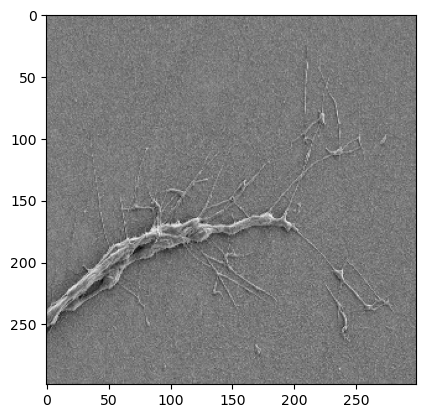

In [4]:
    
plt.imshow(img, cmap='gray')                                                  # Display the image using matplotlib

In [5]:
img.shape

(299, 299)

### Data Preprocessing:

In [6]:
np.random.seed(42)                   # Set randome state

In [7]:
data_dir = './images'                # Same folder path

In [8]:
#batch_size =100                     # Defing Batch size

In [22]:
img_size = (224, 224)           # set Image size

In [23]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   validation_split=0.2,
                                   fill_mode='nearest'
                                  )   


In [24]:
# Train Data
print("train_generator:")
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=14865 ,
    class_mode='categorical',
    subset='training',
    color_mode='grayscale'
)

batch_images, batch_labels = train_generator.next()                # Split IDV & Lable     

train_generator:
Found 14865 images belonging to 10 classes.


In [25]:
# Test Data
print("\nvalidation_generator:")
validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=3714,
    class_mode='categorical',
    subset='validation',
    color_mode='grayscale'
)

batch_images_val, batch_labels_val = validation_generator.next()   # Split IDV & Lable 


validation_generator:
Found 3712 images belonging to 10 classes.


In [26]:
# Display the class indices (useful for building your model)
print("Class Indices:", train_generator.class_indices)

Class Indices: {'Biological': 0, 'Fibres': 1, 'Films_Coated_Surface': 2, 'MEMS_devices_and_electrodes': 3, 'Nanowires': 4, 'Particles': 5, 'Patterned_surface': 6, 'Porous_Sponge': 7, 'Powder': 8, 'Tips': 9}


In [27]:
batch_images.shape

(14865, 224, 224, 1)

In [28]:
batch_labels.shape

(14865, 10)

In [29]:
batch_labels[0:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

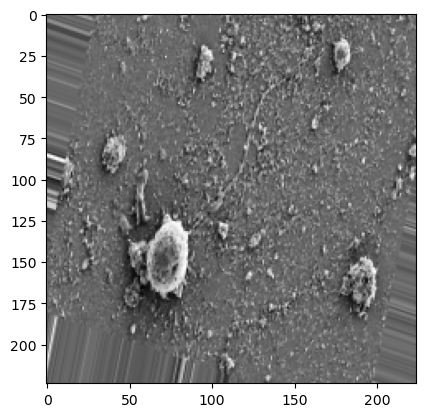

In [30]:
plt.imshow(batch_images[1],cmap='gray')

In [31]:
batch_labels[1,0:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
np.argmax(batch_labels[1,0:10])

0

In [34]:
batch_images.shape

(14865, 224, 224, 1)

### Neural Network

In [35]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(224,224,1),
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3,3)))
cnn.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3,3)))

cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(Dense(units=64,activation='relu'))
cnn.add(Dense(units=10,activation='softmax'))

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [37]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

In [38]:
cnn.fit(batch_images, batch_labels, batch_size=32, epochs=20, validation_data=(batch_images_val, batch_labels_val), callbacks=[early_stopping])

Epoch 1/20


465/465 [==============================] - 309s 636ms/step - loss: 1.5519 - accuracy: 0.4237 - val_loss: 1.3140 - val_accuracy: 0.5264
Epoch 2/20
465/465 [==============================] - 299s 643ms/step - loss: 1.2049 - accuracy: 0.5707 - val_loss: 1.1799 - val_accuracy: 0.5881
Epoch 3/20
465/465 [==============================] - 283s 609ms/step - loss: 1.0293 - accuracy: 0.6339 - val_loss: 1.0727 - val_accuracy: 0.6247
Epoch 4/20
465/465 [==============================] - 284s 611ms/step - loss: 0.8740 - accuracy: 0.6942 - val_loss: 0.9951 - val_accuracy: 0.6552
Epoch 5/20
465/465 [==============================] - 285s 613ms/step - loss: 0.7202 - accuracy: 0.7465 - val_loss: 0.9900 - val_accuracy: 0.6759
Epoch 6/20
465/465 [==============================] - 293s 630ms/step - loss: 0.5755 - accuracy: 0.7968 - val_loss: 1.0161 - val_accuracy: 0.6735
Epoch 7/20
465/465 [==============================] - 286s 614ms/step - loss: 0.4572 - accuracy: 0.8433 - val_loss: 1.0984

In [39]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

In [40]:
cnn.layers

In [41]:
np.argmax(cnn.predict(batch_images_val[0:15]).round(),axis=1)

1/1 [==============================] - 1s 843ms/step


array([6, 8, 4, 3, 0, 3, 4, 4, 0, 5, 0, 5, 4, 3, 6], dtype=int64)

In [42]:
#batch_labels_val[0:15] # actual


In [43]:
np.argmax(batch_labels_val[0:15] , axis=1)

array([3, 8, 9, 3, 0, 6, 4, 4, 5, 5, 8, 5, 4, 1, 6], dtype=int64)

In [44]:
#batch_images_val, batch_labels_val
#batch_images, batch_labels

9


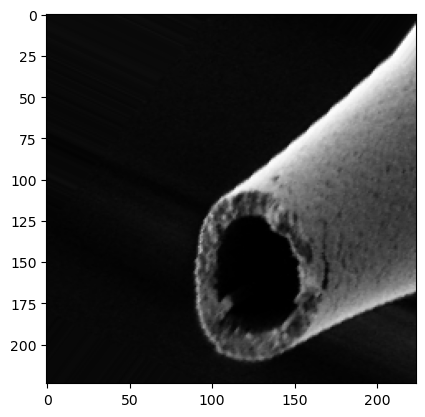

0


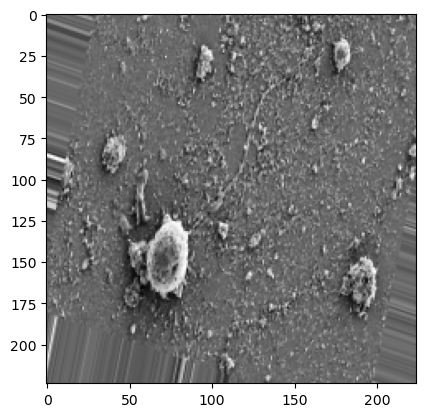

6


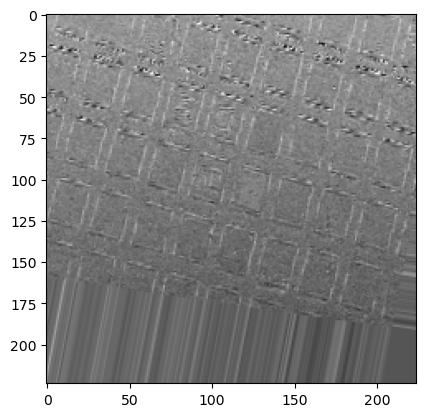

4


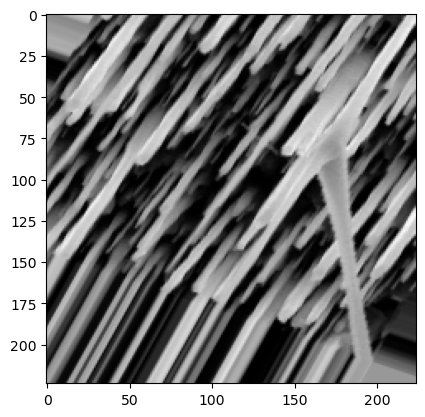

5


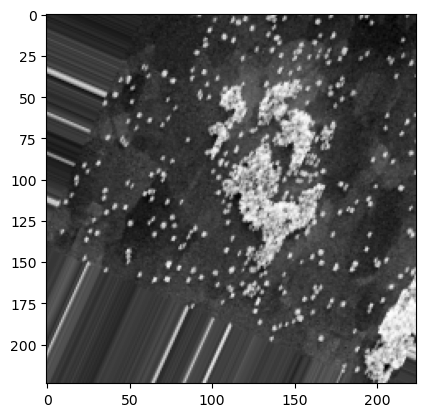

In [45]:
# Training data
for i in range(5):
    print(np.argmax(batch_labels[i]))
    plt.imshow(batch_images[i],cmap='gray')
    plt.show()
    

In [46]:
train_generator.class_indices

{'Biological': 0,
 'Fibres': 1,
 'Films_Coated_Surface': 2,
 'MEMS_devices_and_electrodes': 3,
 'Nanowires': 4,
 'Particles': 5,
 'Patterned_surface': 6,
 'Porous_Sponge': 7,
 'Powder': 8,
 'Tips': 9}

3


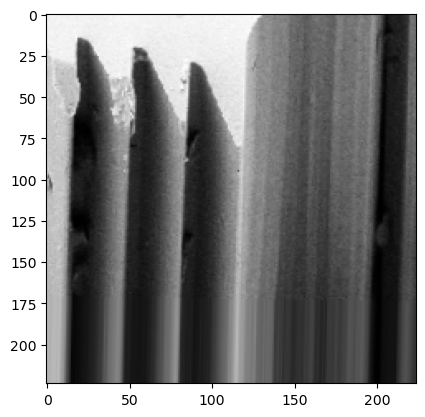

8


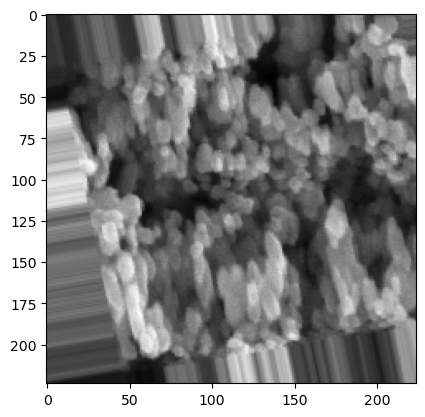

9


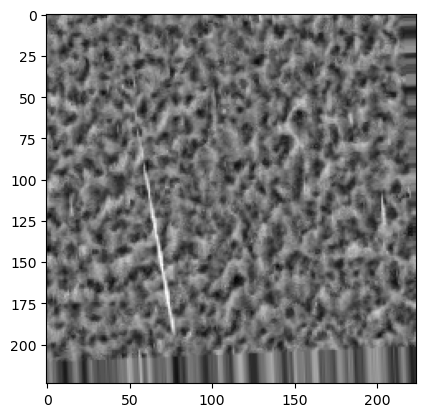

3


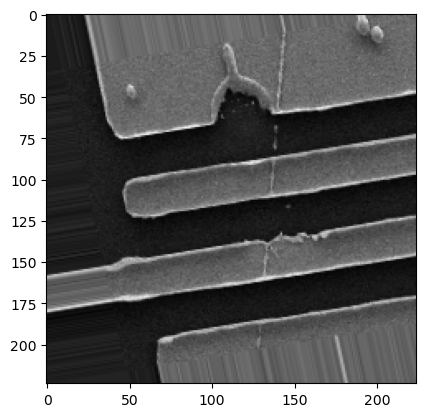

0


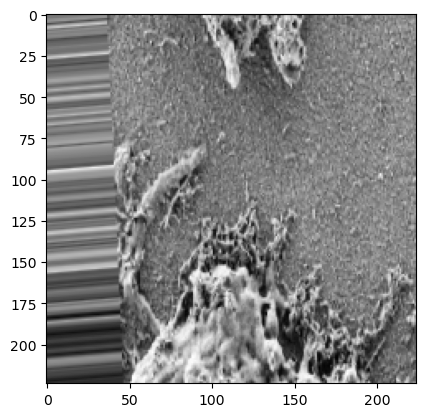

In [47]:
# validation data
for i in range(5):
    print(np.argmax(batch_labels_val[i]))
    plt.imshow(batch_images_val[i],cmap='gray')
    plt.show()
    

In [48]:
# Performance

In [49]:
from sklearn import metrics, multiclass
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
import seaborn as sns


In [50]:
batch_labels_val_actual = np.argmax(batch_labels_val ,axis=1)

In [51]:
batch_labels_val_pred = np.argmax(cnn.predict(batch_images_val).round(),axis=1)

116/116 [==============================] - 17s 143ms/step


In [52]:
print(classification_report(batch_labels_val_actual,batch_labels_val_pred))

              precision    recall  f1-score   support

           0       0.18      0.81      0.29       190
           1       0.67      0.07      0.12        30
           2       0.00      0.00      0.00        61
           3       0.79      0.76      0.77       831
           4       0.80      0.66      0.72       731
           5       0.76      0.77      0.77       682
           6       0.65      0.43      0.52       662
           7       0.00      0.00      0.00        34
           8       0.79      0.51      0.62       179
           9       0.79      0.52      0.63       312

    accuracy                           0.63      3712
   macro avg       0.54      0.45      0.44      3712
weighted avg       0.71      0.63      0.65      3712



C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
batch_labels_val_actual = np.argmax(batch_labels_val ,axis=1)

In [54]:
batch_labels_val_pred = np.argmax(cnn.predict(batch_images_val).round(),axis=1)

116/116 [==============================] - 17s 143ms/step


In [55]:
print(classification_report(batch_labels_val_actual,batch_labels_val_pred))
accuracy_val = accuracy_score(batch_labels_val_actual,batch_labels_val_pred)
print("accuracy_val",accuracy_val)

              precision    recall  f1-score   support

           0       0.18      0.81      0.29       190
           1       0.67      0.07      0.12        30
           2       0.00      0.00      0.00        61
           3       0.79      0.76      0.77       831
           4       0.80      0.66      0.72       731
           5       0.76      0.77      0.77       682
           6       0.65      0.43      0.52       662
           7       0.00      0.00      0.00        34
           8       0.79      0.51      0.62       179
           9       0.79      0.52      0.63       312

    accuracy                           0.63      3712
   macro avg       0.54      0.45      0.44      3712
weighted avg       0.71      0.63      0.65      3712

accuracy_val 0.6263469827586207


C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ashish Vora\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#batch_images, batch_labels

In [57]:
batch_labels_actual = np.argmax(batch_labels ,axis=1)

In [60]:
batch_labels_pred = np.argmax(cnn.predict(batch_images).round(),axis=1)

465/465 [==============================] - 76s 163ms/step


In [61]:
print(classification_report(batch_labels_actual,batch_labels_pred))
accuracy_train = accuracy_score(batch_labels_actual,batch_labels_pred)
print("accuracy_train",accuracy_train)

              precision    recall  f1-score   support

           0       0.20      0.87      0.33       763
           1       1.00      0.18      0.30       123
           2       1.00      0.00      0.01       247
           3       0.92      0.86      0.88      3327
           4       0.92      0.76      0.83      2925
           5       0.88      0.85      0.87      2730
           6       0.82      0.60      0.69      2648
           7       1.00      0.02      0.04       137
           8       0.85      0.66      0.74       716
           9       0.95      0.69      0.80      1249

    accuracy                           0.74     14865
   macro avg       0.85      0.55      0.55     14865
weighted avg       0.86      0.74      0.77     14865

accuracy_train 0.7407332660612176
